## Laboratorio 3

### Andre Marroquin Tarot- 22266

### Sergio Orellana- 221122

### Rodrigo Mansilla 22611

LINK GIT: https://github.com/mar22266/LABORATORIOS-IA.git


# Task 1 - Preguntas Teóricas

1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de 
gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque. 
    
    R//

2. Compare y contraste técnicas de extracción de features (feature extraction)  y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada.

    R//

3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin 
backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.

    R//

# Task 2 y 2.1 Gradiente Descendiente Estocástico

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Generar datos
np.random.seed(42)
x = np.linspace(-2, 2, 100)
y = 2 * x**3 - 3 * x**2 + 5 * x + 3 + np.random.normal(scale=1, size=x.shape) 

In [14]:
# Funciones para el descenso de gradiente
def polinomio(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

def derivada_polinomio(x):
    return np.polyval(np.polyder([2, -3, 5, 3]), x)

def descenso_gradiente(x, y, tasa_aprendizaje=0.01, epocas=1000):
    coeficientes = np.random.randn(4)  # Coeficientes del polinomio de grado 3
    n = len(x)
    
    for _ in range(epocas):
        gradiente = np.array([np.sum((np.polyval(coeficientes, x) - y) * (x**i)) for i in range(4)]) / n
        coeficientes -= tasa_aprendizaje * gradiente[::-1]  # Invertimos el orden de los coeficientes
    
    return coeficientes

def descenso_gradiente_estocastico(x, y, tasa_aprendizaje=0.01, epocas=1000):
    coeficientes = np.random.randn(4)
    n = len(x)
    
    for _ in range(epocas):
        i = np.random.randint(n)
        gradiente = np.array([(np.polyval(coeficientes, x[i]) - y[i]) * (x[i]**j) for j in range(4)])
        coeficientes -= tasa_aprendizaje * gradiente[::-1]
    
    return coeficientes

def descenso_gradiente_minilote(x, y, tasa_aprendizaje=0.01, epocas=1000, tamano_lote=10):
    coeficientes = np.random.randn(4)
    n = len(x)
    
    for _ in range(epocas):
        indices = np.random.choice(n, tamano_lote, replace=False)
        gradiente = np.array([np.sum((np.polyval(coeficientes, x[indices]) - y[indices]) * (x[indices]**i)) for i in range(4)]) / tamano_lote
        coeficientes -= tasa_aprendizaje * gradiente[::-1]
    
    return coeficientes


In [15]:
# Comparación de tiempos de ejecución
tiempo_inicio = time.time()
coeficientes_gd = descenso_gradiente(x, y)
tiempo_intermedio_1 = time.time()
coeficientes_sgd = descenso_gradiente_estocastico(x, y)
tiempo_intermedio_2 = time.time()
coeficientes_mbgd = descenso_gradiente_minilote(x, y)
tiempo_final = time.time()

tiempo_gd = tiempo_intermedio_1 - tiempo_inicio
tiempo_sgd = tiempo_intermedio_2 - tiempo_intermedio_1
tiempo_mbgd = tiempo_final - tiempo_intermedio_2

In [16]:
# Evaluación del fitness
from sklearn.metrics import mean_squared_error

predicciones_gd = np.polyval(coeficientes_gd, x)
predicciones_sgd = np.polyval(coeficientes_sgd, x)
predicciones_mbgd = np.polyval(coeficientes_mbgd, x)

error_gd = mean_squared_error(y, predicciones_gd)
error_sgd = mean_squared_error(y, predicciones_sgd)
error_mbgd = mean_squared_error(y, predicciones_mbgd)

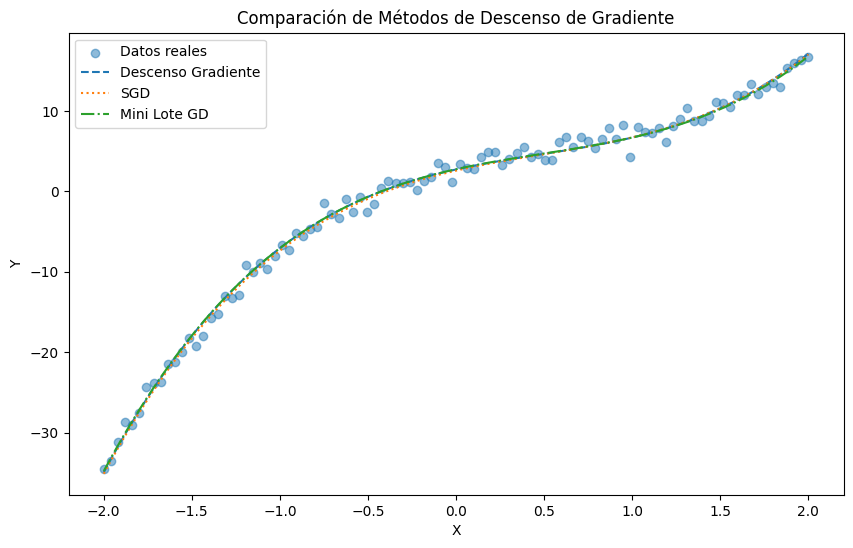

Tiempos de ejecución: GD=0.0403s, SGD=0.0207s, MiniLote GD=0.0511s
Error cuadrático medio: GD=0.8523, SGD=0.8445, MiniLote GD=0.8450


In [17]:
# Visualización de resultados
plt.figure(figsize=(10,6))
plt.scatter(x, y, label='Datos reales', alpha=0.5)
plt.plot(x, predicciones_gd, label='Descenso Gradiente', linestyle='dashed')
plt.plot(x, predicciones_sgd, label='SGD', linestyle='dotted')
plt.plot(x, predicciones_mbgd, label='Mini Lote GD', linestyle='dashdot')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparación de Métodos de Descenso de Gradiente')
plt.show()

# Resultados finales
print(f'Tiempos de ejecución: GD={tiempo_gd:.4f}s, SGD={tiempo_sgd:.4f}s, MiniLote GD={tiempo_mbgd:.4f}s')
print(f'Error cuadrático medio: GD={error_gd:.4f}, SGD={error_sgd:.4f}, MiniLote GD={error_mbgd:.4f}')


# Comparación 

## Fitness (Precisión)

- **SGD** obtuvo el menor error cuadrático medio (**MSE = 0.8445**), seguido de cerca por el **Mini Lote GD** (**MSE = 0.8450**) y finalmente por el **GD estándar** (**MSE = 0.8523**). Esto sugiere que el **SGD** fue más preciso al ajustar los parámetros del modelo en este caso.
- La ventaja del **SGD** puede deberse a su capacidad para escapar de mínimos locales mediante actualizaciones frecuentes y pequeñas basadas en muestras individuales.

## Eficiencia (Tiempo de Ejecución)

- **SGD** fue el método más rápido (**0.0207s**) debido a que realiza actualizaciones más frecuentes con menos datos por iteración.
- **GD estándar** necesitó procesar todo el conjunto de datos en cada paso, resultando en un tiempo intermedio (**0.0403s**).
- **Mini Lote GD** se encuentra entre los otros dos métodos en términos de velocidad, con un tiempo de **0.0511s**, ya que procesa lotes pequeños de datos en lugar de todo el conjunto.

## Conclusión

- **Mejor Fitness**: El **SGD** obtuvo el menor error (**MSE = 0.8445**), lo que lo hace el más preciso para este conjunto de datos.
- **Más Rápido**: El **SGD** también fue el más rápido (**0.0207s**), confirmando su ventaja en eficiencia computacional.
- **Razón**: El **SGD** realiza actualizaciones más frecuentes y enfocadas, lo que lo hace eficiente tanto en términos de tiempo como en convergencia.  
  Sin embargo, podría no ser siempre el mejor si los datos contienen mucho ruido. En este caso, funcionó bien debido a la naturaleza del problema y los datos.


# Task 2.2  Feature Selection

# Task 3 Perceptrón

## Referencias: